In [1]:
USE {
    repositories {
        maven("https://repsy.io/mvn/yeicor/github-public")
    }

    dependencies {
        implementation("com.github.yeicor:kraphviz:1.0.0")
    }
}

In [2]:
import org.mikrograd.diff.MLP
import org.mikrograd.diff.Value
import org.mikrograd.diff.minus

### Network parameters

### Weights

In [3]:
val w1 = Value(0.15)
w1.label = "w1"
val w2 = Value(0.2)
w2.label = "w2"
val w3 = Value(0.25)
w3.label = "w3"
val w4 = Value(0.3)
w4.label = "w4"
val w5 = Value(0.4)
w5.label = "w5"
val w6 = Value(0.45)
w6.label = "w6"

### Input values and output

In [5]:
val x1 = Value(0.05)
x1.label = "x1"
val x2 = Value(0.1)
x2.label = "x2"
val y = Value(0.01)
y.label = "y"

## Feed forward

In [6]:
val x1w1 = x1*w1
x1w1.label = "x1*w1"
val x2w2 = x2*w2
x2w2.label = "x2*w2"
val z1 = x1w1 +x2w2
z1.label = "z1"

val x1w3 = x1*w3
x1w3.label = "x1*w3"
val x2w4 = x2*w4
x2w4.label = "x2*w4"
val z2 = x1w3 + x2w4
z2.label = "z2"

In [7]:
val h1 = z1.sigmoid()
val h2 = z2.sigmoid()

In [8]:
h1

Value(data=0.5068745667645342, grad=0.0, op=sigmoid, label='sigmoid(z1)')

In [9]:
h2

Value(data=0.5106234010049637, grad=0.0, op=sigmoid, label='sigmoid(z2)')

In [10]:
val h1w5 = h1*w5
h1w5.label = "h1*w5"
val h2w6 = h2*w6
h2w6.label = "h2*w6"

val z_out = h1w5 + h2w6
z_out.label = "z_out"

In [11]:
val y_ = z_out.sigmoid()

In [12]:
y_

Value(data=0.606477732206728, grad=0.0, op=sigmoid, label='sigmoid(z_out)')

## Loss

In [13]:
val loss = ((y - y_).pow(2.0)) / 2

In [14]:
loss.backward()

In [15]:
y_

Value(data=0.606477732206728, grad=0.596477732206728, op=sigmoid, label='sigmoid(z_out)')

## DAG visualization

In [17]:
import java.io.File
import org.mikrograd.utils.drawDot

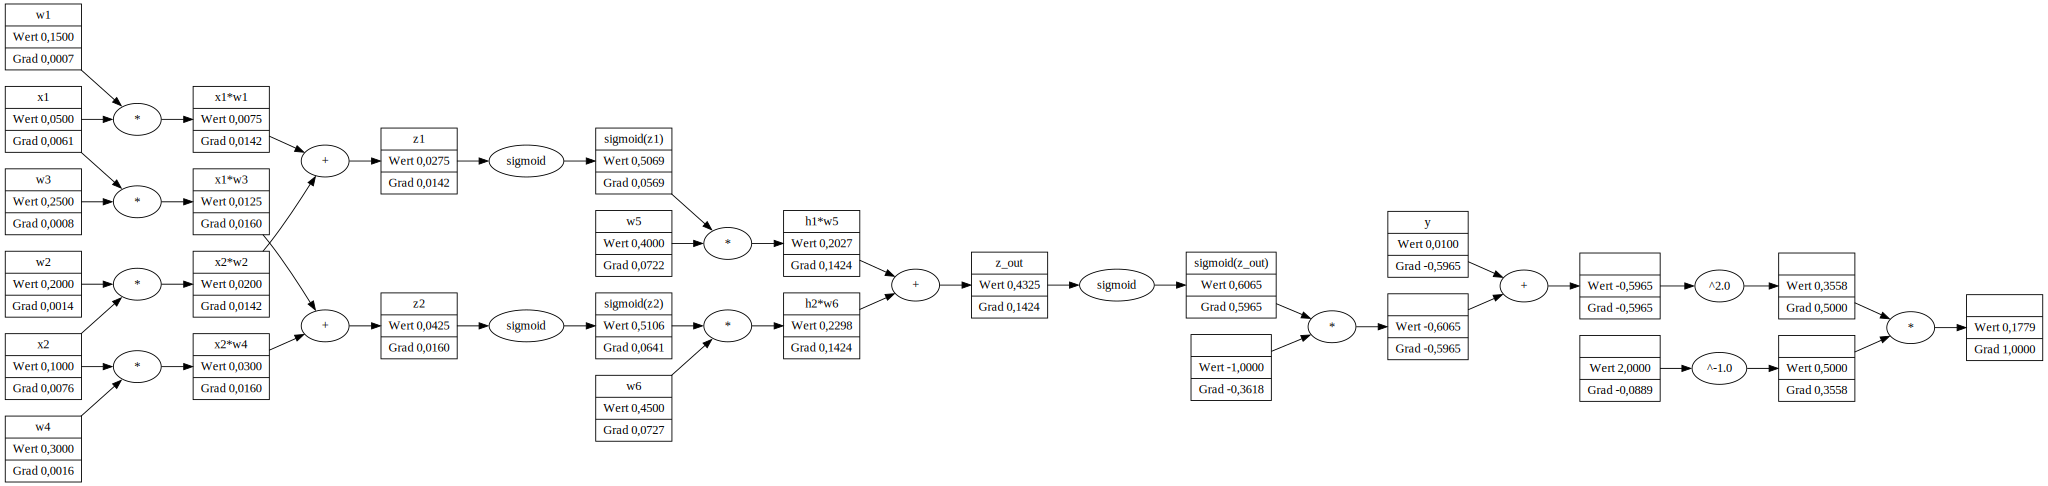

In [21]:
val dotStr = drawDot(loss, withGradient = true, gradLabel = "Grad", valueLabel = "Wert").render()

val svg = com.github.yeicor.kraphviz.Kraphviz().render(dotStr)
File("mlp_2_2_1.svg").writeText(svg)
MIME("image/svg+xml" to svg)